<a href="https://colab.research.google.com/github/prabhkaur301/Heart-Disease-prediction/blob/main/Copy_of_Heart_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Important Reference Links:-


* [Guide to statistical description (data.decsribe() method)](https://towardsdatascience.com/how-do-we-describe-data-9ce688943c8e)
*  [Linear Regression](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

Importing the dependencies 


*   numpy is used to handle the multidimensional arrays
*   pandas is used to handle the data in the form of dataframes(structured data)
*   train_test.split is used to split the data in two different datasets , one is for training the model and other for testing .
*   Logistic Regression is the model in which we fetch the data for training. We used this model because it is apt for binary classification . In this case, We have two option either heart diseased or not.
*   accuracy_score is used to test how well our model is working.







In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import add
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Data collection & Data Pre-processing

In [4]:
## loading csv data into pandas dataframe
raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart disease prediction/heart.csv')


In [5]:
## printing the data
raw_data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
## getting the number of rows and columns
raw_data.shape

(303, 14)

In [7]:
## getting the detailed information about dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
## checking for null values
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


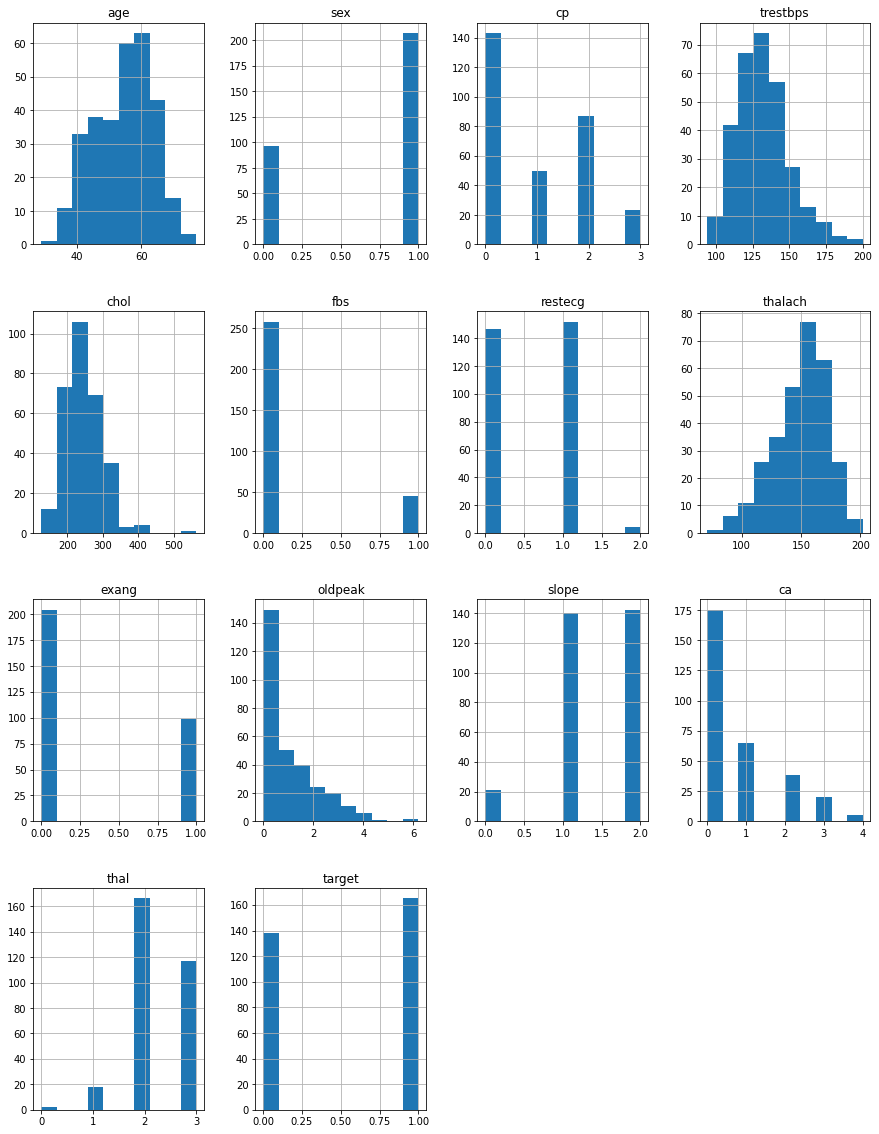

In [35]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
raw_data.hist(ax = ax)
plt.show()

In [9]:
## getting detailed statistical information about the dataset
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
## checking the distribution of target column ( How many are suffereing from heart disease and how many are not)
raw_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

0 --> Represents non defective heart 

---
1 --> Represents defective heart

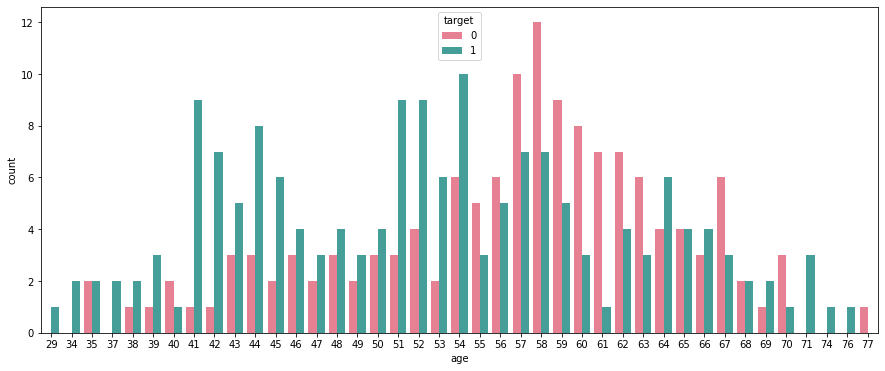

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = raw_data, hue = 'target',palette='husl')
plt.show()

Checking how many values in Target column are of the type Int

In [11]:
raw_data['target'].map(type) == int

0      True
1      True
2      True
3      True
4      True
       ... 
298    True
299    True
300    True
301    True
302    True
Name: target, Length: 303, dtype: bool

In [43]:

def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

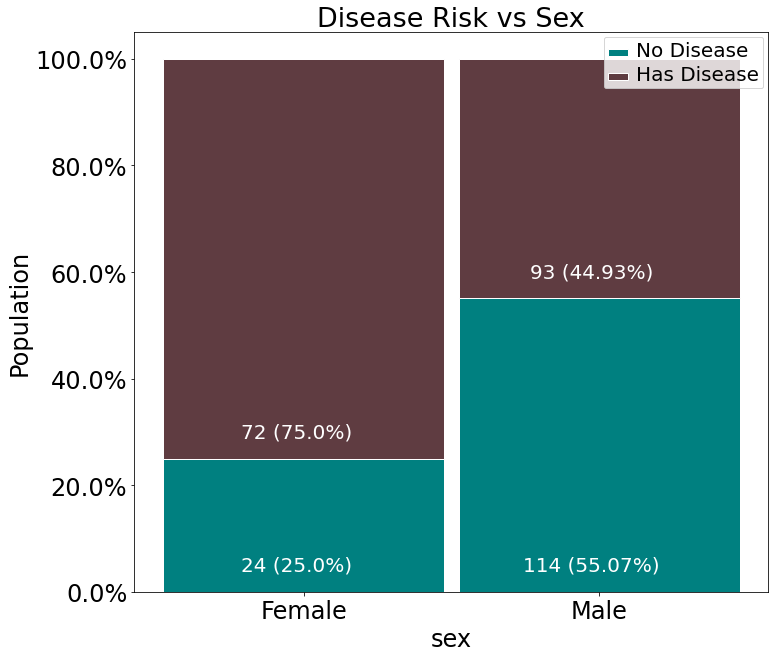

In [48]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = raw_data[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Disease Risk vs Sex', ylabel = 'Population')


Splitting the Target & Features as two seperate variables X and Y

In [12]:
## splitting the columns in two diffrent variables
X=raw_data.drop(columns='target', axis=1)
Y=raw_data['target']

In [13]:
print(X)
print(Y)


     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

Splitting the dataframe into two groups ( Training & Testing)


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [16]:
print(Y.shape,Y_train.shape,Y_test.shape)

(303,) (242,) (61,)


Training the Model 
We are choosing Logistic Regression model for training the dataset as it is good for binary classification.

[Detailed Explanation](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [17]:
model=LogisticRegression()


In [18]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Evaluation of Model

In [19]:
# Evaluation of Model using accuracy_score function from sklearn library

## accuracy score on training data
training_prediction=model.predict(X_train)
training_accuracy_score=accuracy_score(training_prediction,Y_train)


In [20]:
print(training_accuracy_score)

0.8512396694214877


In [21]:
## accuracy score on testing data
testing_prediction=model.predict(X_test)
testing_accuracy_score=accuracy_score(testing_prediction,Y_test)

In [22]:
print(testing_accuracy_score)

0.819672131147541


Here we have little difference in the accuracy score of training and testing data . So we can say that model is trained well . It is not over-fitted

### Predictive System




In [49]:
# Taking the input from user 64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
print("Please enter the following detail")
input_data=(int(input("Age:-\n")),
            int(input("Gender:-\n0 for Female \n1 for male")),
            int(input("Chest Pain measurefrom 0-4\n0-->No Pain 4--> Severe pain:-\n")),
            int(input("Resting Blood Pressure value:-\n")),
            int(input("Cholestrol Value:-\n")),
            int(input("Fasting Blood Sugar:-\n")),
            int(input("Rest ECG:-\n")),
            int(input("Max Heart Rate:-\n")),
            int(input("Exercised induced Agina:-\n")),
            float(input("ST Depression:-\n")),
            int(input("The slope of the peak exercise ST segment:-\n")),
            int(input("Number of major vessels (0-3) colored by flourosopy:-\n")),
            int(input("Thalessemia Value:- \n thal: 3 = normal; 6 = fixed defect; 7 = reversable defect\n"))
            )

Please enter the following detail
Age:-
57
Gender:-
0 for Female 
1 for male0
Chest Pain measurefrom 0-4
0-->No Pain 4--> Severe pain:-
0
Resting Blood Pressure value:-
176
Cholestrol Value:-
200
Fasting Blood Sugar:-
120
Rest ECG:-
1
Max Heart Rate:-
200
Exercised induced Agina:-
0
ST Depression:-
0
The slope of the peak exercise ST segment:-
1
Number of major vessels (0-3) colored by flourosopy:-
1
Thalessemia Value:- 
 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
2


In [50]:
print(input_data)

(57, 0, 0, 176, 200, 120, 1, 200, 0, 0.0, 1, 1, 2)


In [51]:
 input_data_as_numpy= np.asarray(input_data)

In [52]:
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print(color.BOLD+color.GREEN+"\n\n*********************************************\nThe person's heart is healthy :)\n*********************************************\n\n"+color.END)
else:
    print(color.BOLD+color.RED+"\n\n*********************************************\nThe person is suffering from heart disease :(\n*********************************************\n\n"+color.END)

[0]


*********************************************
The person's heart is healthy :)
*********************************************




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
